<a href="https://colab.research.google.com/github/albertorekena/education-improvement/blob/master/Pruebas_clustering_Raul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
import xgboost



from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler




from sklearn.metrics import mean_squared_error, make_scorer,mean_absolute_error


from sklearn.decomposition import PCA
import statsmodels.regression.linear_model as sm


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',33)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#df_mat = pd.read_pickle('df_mat.pkl')

#df_mat.head()
df_mat = pd.read_csv('student-mat.csv', sep=';')
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## G3 

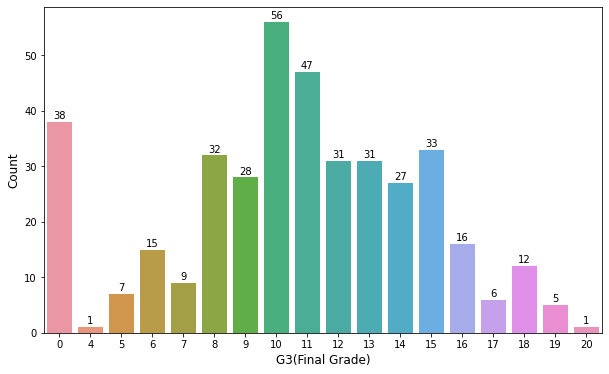

In [3]:
plt.figure(figsize = (10,6))
ax = sns.countplot(df_mat['G3'])
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 0.6,p.get_height(),ha = 'center')

In [4]:
df_mat['G3'].value_counts().sort_index(ascending = False)

20     1
19     5
18    12
17     6
16    16
15    33
14    27
13    31
12    31
11    47
10    56
9     28
8     32
7      9
6     15
5      7
4      1
0     38
Name: G3, dtype: int64

In [5]:
print('The Median of G3(Final Grade) is: {}'.format(round(df_mat['G3'].median(),2)))
print('The Mean of G3(Final Grade) is: {}'.format(round(df_mat['G3'].mean(),2)))

The Median of G3(Final Grade) is: 11.0
The Mean of G3(Final Grade) is: 10.42


In [6]:
df_mat['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

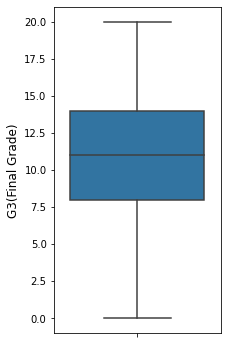

In [7]:
plt.figure(figsize = (3,6))
sns.boxplot(df_mat['G3'],orient = 'v')
plt.ylabel('G3(Final Grade)',fontsize = 12);

## school

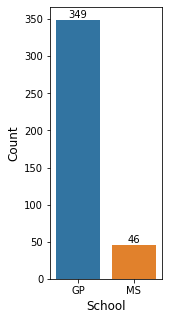

In [8]:
plt.figure(figsize = (2,5))
ax = sns.countplot(df_mat['school'])
plt.xlabel('School',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 3,p.get_height(),ha = 'center')

## Influencia de la Localización del Domicilio

In [9]:
df_mat_place = df_mat[['school','address','traveltime','G3']]

df_mat_place.head()

,school,address,traveltime,G3
0,GP,U,2,6
1,GP,U,1,6
2,GP,U,1,10
3,GP,U,1,15
4,GP,U,1,10


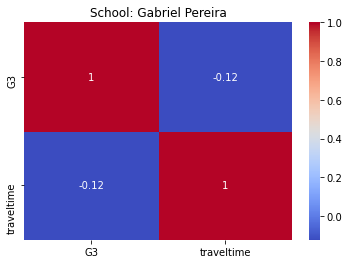

In [10]:
plt.figure()
ax = sns.heatmap(df_mat_place[df_mat_place['school'] == 'GP'].corr(),annot = True,cmap = 'coolwarm')
ax.invert_xaxis()
ax.set_ylim([0,2])
ax.set_title('School: Gabriel Pereira');

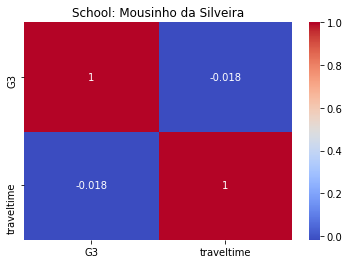

In [11]:
plt.figure()
ax = sns.heatmap(df_mat_place[df_mat_place['school'] == 'MS'].corr(),annot = True,cmap = 'coolwarm')
ax.invert_xaxis()
ax.set_ylim([0,2])
ax.set_title('School: Mousinho da Silveira');

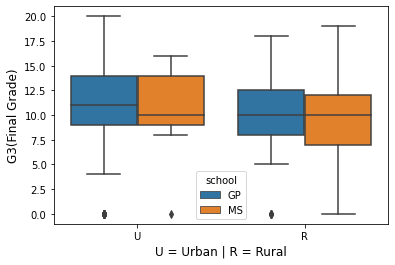

In [12]:
sns.boxplot(data = df_mat_place,x = 'address',y = 'G3',hue = 'school')
plt.xlabel('U = Urban | R = Rural',fontsize = 12)
plt.ylabel('G3(Final Grade)',fontsize = 12);

## A partir de aquí

In [0]:
df_mat_histograms = df_mat.drop('G3',axis = 1)

In [14]:
df_mat.shape

(395, 33)

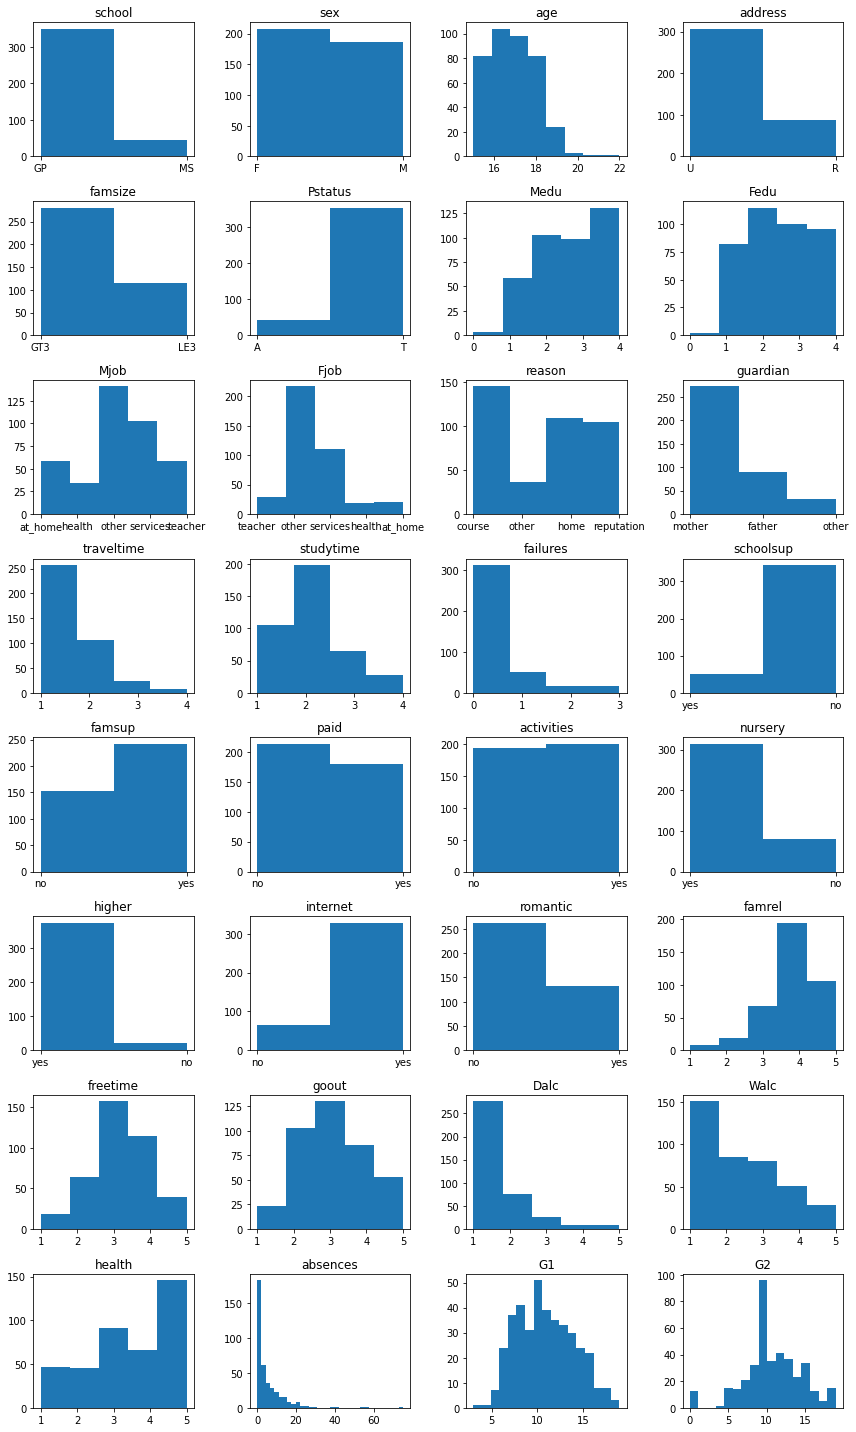

In [15]:
fig = plt.figure(figsize = (12,20))
for i in range(1,df_mat_histograms.shape[1] + 1):
    plt.subplot(8,4,i)
    ax = plt.gca()
    ax.set_title(df_mat_histograms.columns[i - 1],fontsize = 12)
    ax.tick_params(axis = 'x')
    n_unique_values = len(df_mat_histograms.iloc[:,i - 1].unique())
    plt.hist(df_mat_histograms.iloc[:,i - 1],bins = n_unique_values)
fig.tight_layout();

In [16]:
df_mat.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [0]:
df_mat['school'] = df_mat['school'].apply(lambda x: 1 if x == 'GP' else 0)
df_mat['sex'] = df_mat['sex'].apply(lambda x: 1 if x == 'F' else 0)
df_mat['address'] = df_mat['address'].apply(lambda x: 1 if x == 'U' else 0)
df_mat['famsize'] = df_mat['famsize'].apply(lambda x: 1 if x == 'GT3' else 0)
df_mat['Pstatus'] = df_mat['Pstatus'].apply(lambda x: 1 if x == 'T' else 0)

In [0]:
binary_variables = ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

for v in binary_variables:
    df_mat[v] = df_mat[v].apply(lambda x: 1 if x == 'yes' else 0)

In [19]:
df_mat.dtypes

school         int64
sex            int64
age            int64
address        int64
famsize        int64
Pstatus        int64
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup      int64
famsup         int64
paid           int64
activities     int64
nursery        int64
higher         int64
internet       int64
romantic       int64
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [20]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,1,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,1,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,1,1,15,1,0,1,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,1,1,15,1,1,1,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,1,1,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


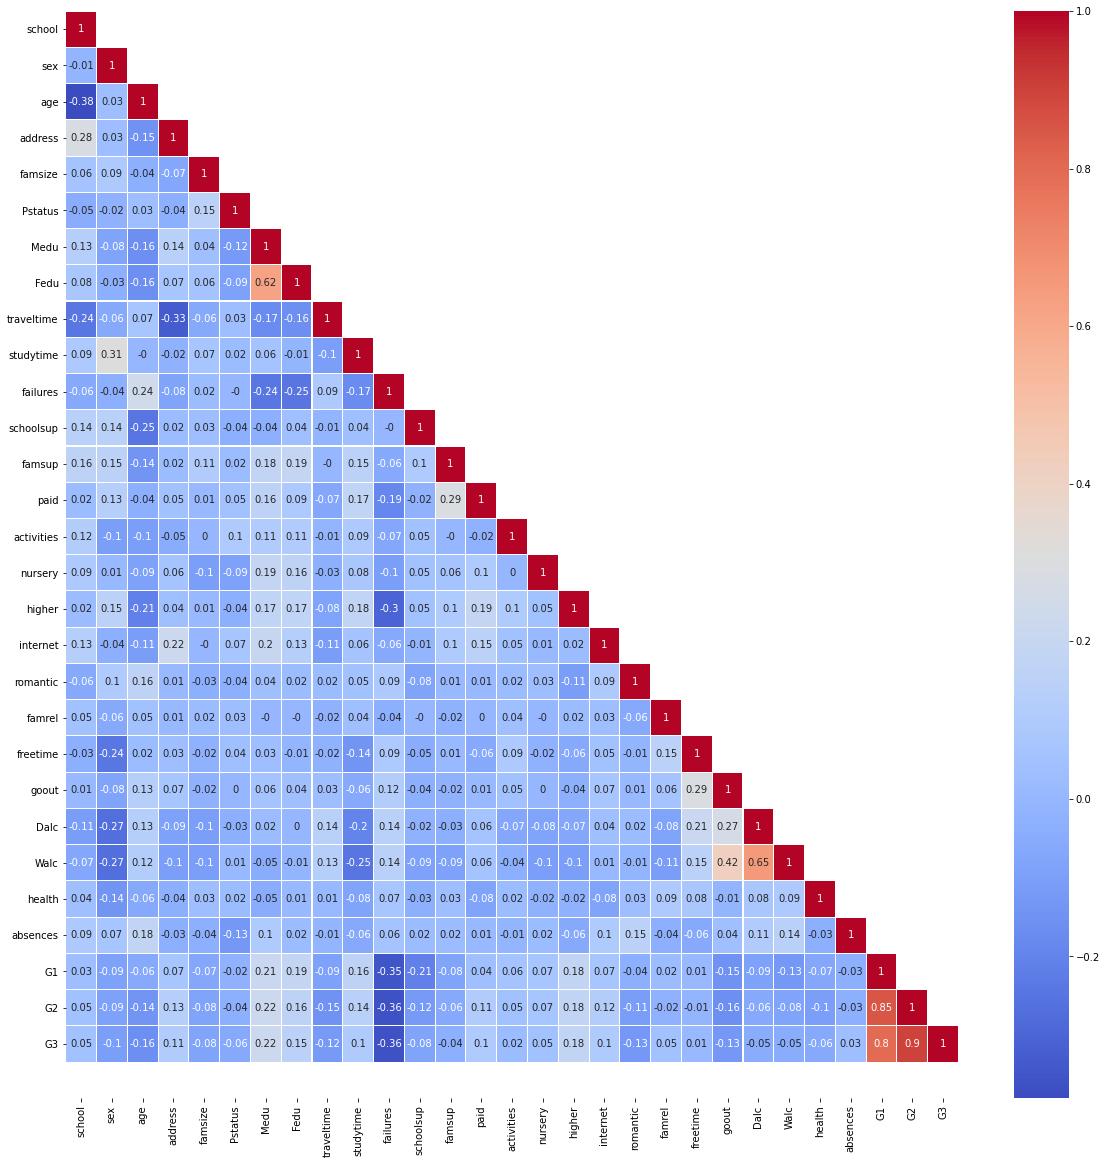

In [21]:
df_corr = df_mat.corr().round(2)

mask = np.ones(df_corr.shape,dtype = bool)
mask[np.tril_indices_from(mask)] = False

f,ax = plt.subplots(figsize = (20,20))
ax = sns.heatmap(df_corr,mask = mask,annot = True,cmap = 'coolwarm',linewidth = 0.1,linecolor = 'white')
ax.set_ylim([30,0]);

In [0]:
categorical_feats = df_mat.dtypes[df_mat.dtypes == 'object'].index
df_corr = df_mat.drop(categorical_feats,axis = 1)

In [0]:
def print_correlation_table(df_corr, variable):
    correlation_abs = round(df_corr.corr()[variable].abs(),2)
    correlation_type = df_corr.corr()[variable].apply(lambda x: 'Pos' if x >= 0 else 'Neg')
    correlation = pd.concat([correlation_abs,correlation_type],axis = 1,keys = ['correlation','type'])
    correlation = correlation.sort_values('correlation',ascending = False)
    return correlation

In [24]:
print_correlation_table(df_corr, 'G3')

,correlation,type
G3,1.00,Pos
G2,0.90,Pos
G1,0.80,Pos
failures,0.36,Neg
Medu,0.22,Pos
higher,0.18,Pos
age,0.16,Neg
Fedu,0.15,Pos
romantic,0.13,Neg
goout,0.13,Neg


In [25]:
df_mat["guardian"].value_counts()

mother    273
father     90
other      32
Name: guardian, dtype: int64

In [0]:
one_hot_Mjob = pd.get_dummies(df_mat['Mjob'])

In [27]:
one_hot_Mjob

,at_home,health,other,services,teacher
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
390,0,0,0,1,0
391,0,0,0,1,0
392,0,0,1,0,0
393,0,0,0,1,0


In [0]:
#for i in ["at_home", "health", "other", "services", "teacher"]:
#    print(one_hot_Mjob[i].value_counts())

In [0]:
one_hot_Mjob = one_hot_Mjob.drop(columns = "health")

In [0]:
one_hot_Mjob = one_hot_Mjob.rename(columns={"at_home": "Mjob_at_home", "other": "Mjob_other", "services": "Mjob_services", "teacher": "Mjob_teacher"})

In [31]:
one_hot_Mjob

,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0
...,...,...,...,...
390,0,0,1,0
391,0,0,1,0
392,0,1,0,0
393,0,0,1,0


In [32]:
df_mat_temp = pd.concat([df_mat, one_hot_Mjob], axis=1)

df_mat_temp.drop(columns = "Mjob")

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher
0,1,1,18,1,1,0,4,4,teacher,course,mother,2,2,0,1,0,...,0,0,4,3,4,1,1,3,6,5,6,6,1,0,0,0
1,1,1,17,1,1,1,1,1,other,course,father,1,2,0,0,1,...,1,0,5,3,3,1,1,3,4,5,5,6,1,0,0,0
2,1,1,15,1,0,1,1,1,other,other,mother,1,2,3,1,0,...,1,0,4,3,2,2,3,3,10,7,8,10,1,0,0,0
3,1,1,15,1,1,1,4,2,services,home,mother,1,3,0,0,1,...,1,1,3,2,2,1,1,5,2,15,14,15,0,0,0,0
4,1,1,16,1,1,1,3,3,other,home,father,1,2,0,0,1,...,0,0,4,3,2,1,2,5,4,6,10,10,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,0,0,2,2,services,course,other,1,2,2,0,1,...,0,0,5,5,4,4,5,4,11,9,9,9,0,0,1,0
391,0,0,17,1,0,1,3,1,services,course,mother,2,1,0,0,0,...,1,0,2,4,5,3,4,2,3,14,16,16,0,0,1,0
392,0,0,21,0,1,1,1,1,other,course,other,1,1,3,0,0,...,0,0,5,5,3,3,3,3,3,10,8,7,0,1,0,0
393,0,0,18,0,0,1,3,2,other,course,mother,3,1,0,0,0,...,1,0,4,4,1,3,4,5,0,11,12,10,0,0,1,0


In [0]:
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df


In [0]:
df_mat_one_hot = one_hot(df_mat, ["Mjob", "Fjob", "reason", "guardian"])
#quitar columnas originales (categóricas)
df_mat_one_hot = df_mat_one_hot.drop(columns = ["Mjob", "Fjob", "reason", "guardian"])
#quitar una columna de one hot de cada una de las variables para reducir la colinearidad (hace falta ver 
#cuál se quiere quitar en cada caso)
df_mat_one_hot = df_mat_one_hot.drop(columns = ["Mjob_health", "Fjob_health", "guardian_other", "reason_other"])

In [35]:
df_mat_one_hot

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,...,G1,G2,G3,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,...,5,6,6,1,0,0,0,0,0,0,1,1,0,0,0,1
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,...,5,5,6,1,0,0,0,0,1,0,0,1,0,0,1,0
2,1,1,15,1,0,1,1,1,1,2,3,1,0,1,0,1,...,7,8,10,1,0,0,0,0,1,0,0,0,0,0,0,1
3,1,1,15,1,1,1,4,2,1,3,0,0,1,1,1,1,...,15,14,15,0,0,0,0,0,0,1,0,0,1,0,0,1
4,1,1,16,1,1,1,3,3,1,2,0,0,1,1,0,1,...,6,10,10,0,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,0,0,2,2,1,2,2,0,1,1,0,1,...,9,9,9,0,0,1,0,0,0,1,0,1,0,0,0,0
391,0,0,17,1,0,1,3,1,2,1,0,0,0,0,0,0,...,14,16,16,0,0,1,0,0,0,1,0,1,0,0,0,1
392,0,0,21,0,1,1,1,1,1,1,3,0,0,0,0,0,...,10,8,7,0,1,0,0,0,1,0,0,1,0,0,0,0
393,0,0,18,0,0,1,3,2,3,1,0,0,0,0,0,0,...,11,12,10,0,0,1,0,0,1,0,0,1,0,0,0,1


In [36]:
#print_correlation_table(df_mat_one_hot, 'Mjob_at_home')
#print_correlation_table(df_mat_one_hot, 'Mjob_other')
#print_correlation_table(df_mat_one_hot, 'Mjob_services')
#print_correlation_table(df_mat_one_hot, 'Mjob_teacher')
print_correlation_table(df_mat_one_hot, 'G3')

,correlation,type
G3,1.00,Pos
G2,0.90,Pos
G1,0.80,Pos
failures,0.36,Neg
Medu,0.22,Pos
higher,0.18,Pos
age,0.16,Neg
Fedu,0.15,Pos
romantic,0.13,Neg
goout,0.13,Neg


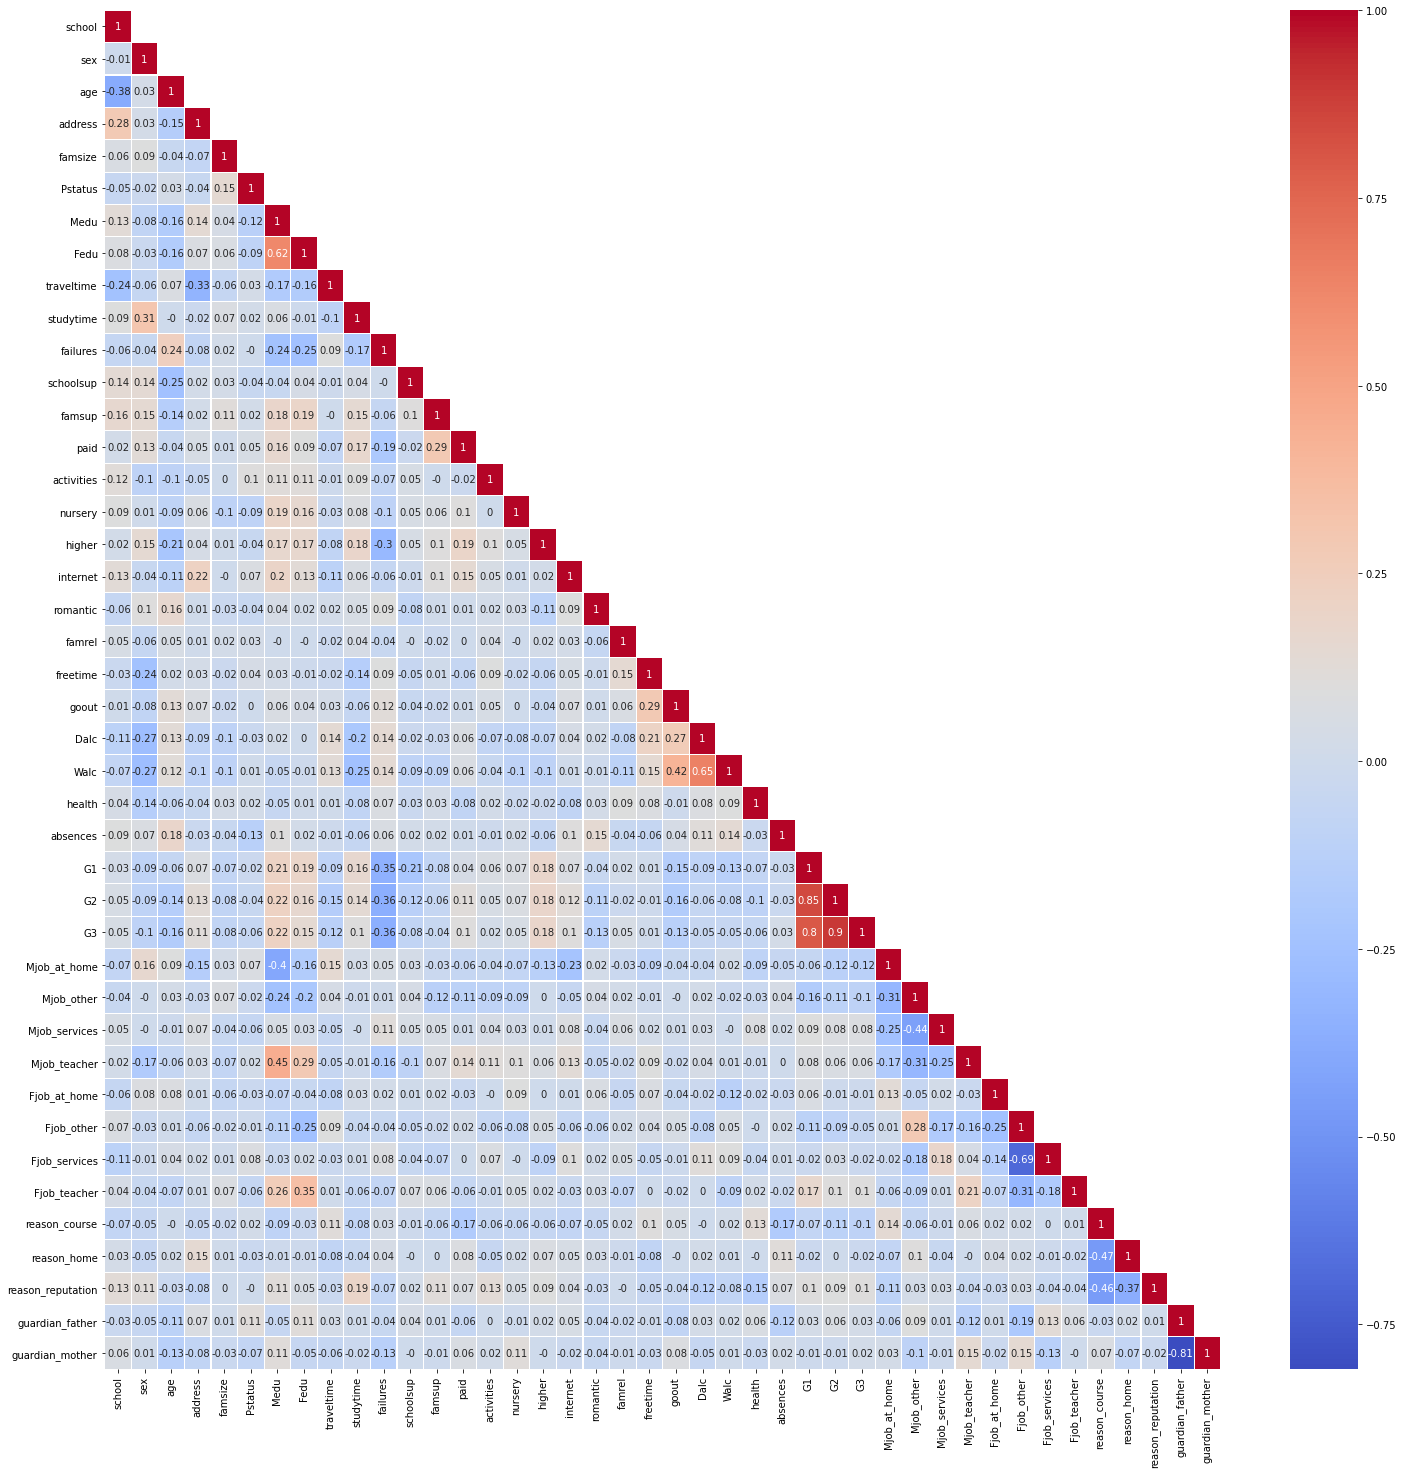

In [37]:
df_corr_oh = df_mat_one_hot.corr().round(2)


mask_oh = np.ones(df_corr_oh.shape,dtype = bool)
mask_oh[np.tril_indices_from(mask_oh)] = False



f,ax = plt.subplots(figsize = (25,25))
ax = sns.heatmap(df_corr_oh,mask = mask_oh,annot = True,cmap = 'coolwarm',linewidth = 0.1,linecolor = 'white')
ax.set_ylim([42,0]);

In [38]:
df_mat["Fjob"].value_counts(normalize = True)

other       0.549367
services    0.281013
teacher     0.073418
at_home     0.050633
health      0.045570
Name: Fjob, dtype: float64

In [39]:
df_mat_one_hot.shape

(395, 42)

In [0]:
df_mat_one_hot = df_mat_one_hot.drop(columns = ["G1", "G2"])

In [41]:
df_mat_one_hot.drop(columns = ["G3"]).columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'Mjob_at_home', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_reputation', 'guardian_father',
       'guardian_mother'],
      dtype='object')

In [42]:
# Define our dependent variable
y_column = 'G3'
y = df_mat_one_hot[y_column]
# Define  our independent variables
x_columns = df_mat_one_hot.drop(columns = ["G3"]).columns
X = df_mat_one_hot[x_columns]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
#X['cnst'] = 0
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = sm.OLS(endog = y_train,exog = X_train).fit()
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.861
Method:                 Least Squares   F-statistic:                              51.28
Date:                Sat, 11 Apr 2020   Prob (F-statistic):                   9.30e-105
Time:                        10:39:40   Log-Likelihood:                         -881.70
No. Observations:                 316   AIC:                                      1841.
Df Residuals:                     277   BIC:                                      1988.
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [0]:
#model1.get_prediction(exog = X_test).summary()

In [44]:
# Get predictions for the test data
y_pred_test = model1.predict(X_test)
print(f'root mean squared error on test data: {np.sqrt(mean_squared_error(y_test,y_pred_test)):.4}')


root mean squared error on test data: 4.298


In [45]:
y_pred_test

78      2.405971
371     6.012348
248     9.425891
55     10.502224
390     9.824642
         ...    
364     7.956694
82     12.338983
114    11.961957
3      10.310752
18      6.643230
Length: 79, dtype: float64

In [46]:
y_test

78     10
371    12
248     5
55     10
390     9
       ..
364    12
82      6
114     9
3      15
18      5
Name: G3, Length: 79, dtype: int64

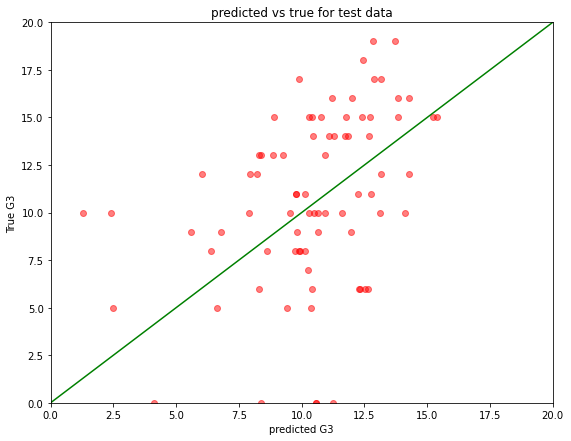

In [47]:
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test, y_test, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('predicted G3')
plt.ylabel('True G3')
plt.xlim(0,20)
plt.ylim(0,20)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g');
plt.show();

In [0]:
df_mat_comparison = df_mat_one_hot

In [49]:
# Define our dependent variable
y_column = 'G3'
y = df_mat_one_hot[y_column]
# Define  our independent variables
x_columns = ["absences", "goout", "romantic", "higher", "famsup", "failures", "studytime", "age", "sex"]
X = df_mat_one_hot[x_columns]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
#X['cnst'] = 0
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model2 = sm.OLS(endog = y_train,exog = X_train).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.864
Model:                            OLS   Adj. R-squared (uncentered):              0.860
Method:                 Least Squares   F-statistic:                              216.2
Date:                Sat, 11 Apr 2020   Prob (F-statistic):                   3.22e-127
Time:                        10:39:40   Log-Likelihood:                         -899.61
No. Observations:                 316   AIC:                                      1817.
Df Residuals:                     307   BIC:                                      1851.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

root mean squared error on test data: 4.515


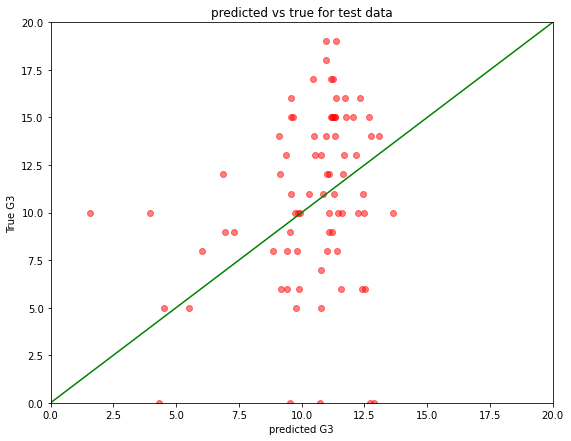

In [50]:
# Get predictions for the test data
y_pred_test_2 = model2.predict(X_test)
print(f'root mean squared error on test data: {np.sqrt(mean_squared_error(y_test,y_pred_test_2)):.4}')
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test_2, y_test, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('predicted G3')
plt.ylabel('True G3')
plt.xlim(0,20)
plt.ylim(0,20)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g');
plt.show();

In [51]:

# Define our dependent variable
y_column = 'G3'
y = df_mat_one_hot[y_column]
# Define  our independent variables

x_columns = ["absences",  "romantic", "higher",  "failures", "studytime", "age", "sex"]
#"Mjob_teacher", "goout","famsup",
X = df_mat_one_hot[x_columns]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
#X['cnst'] = 0
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model3 = sm.OLS(endog = y_train,exog = X_train).fit()
print(model3.summary())

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.863
Model:                            OLS   Adj. R-squared (uncentered):              0.860
Method:                 Least Squares   F-statistic:                              277.6
Date:                Sat, 11 Apr 2020   Prob (F-statistic):                   3.38e-129
Time:                        10:39:40   Log-Likelihood:                         -900.72
No. Observations:                 316   AIC:                                      1815.
Df Residuals:                     309   BIC:                                      1842.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [52]:
print(f'root mean squared error on test data 2: {np.sqrt(mean_squared_error(y_test,y_pred_test_2)):.4}')
print(f'root mean squared error on test data 1: {np.sqrt(mean_squared_error(y_test,y_pred_test)):.4}')

root mean squared error on test data 2: 4.515
root mean squared error on test data 1: 4.298


root mean squared error on test data: 4.511


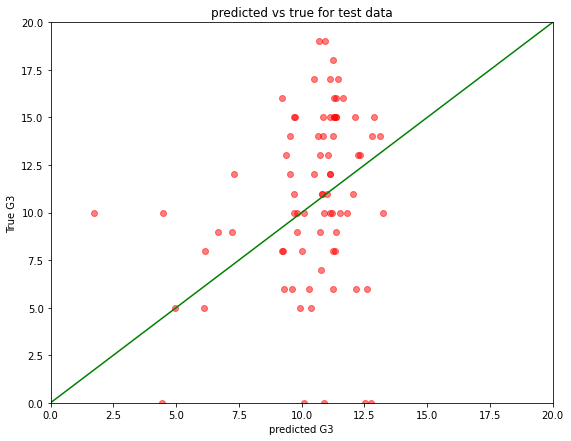

In [53]:
# Get predictions for the test data
y_pred_test_3 = model3.predict(X_test)
print(f'root mean squared error on test data: {np.sqrt(mean_squared_error(y_test,y_pred_test_3)):.4}')
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test_3, y_test, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('predicted G3')
plt.ylabel('True G3')
plt.xlim(0,20)
plt.ylim(0,20)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g');
plt.show();

# Quitar los 0's y reemplazarlos por la media de G1 y G2

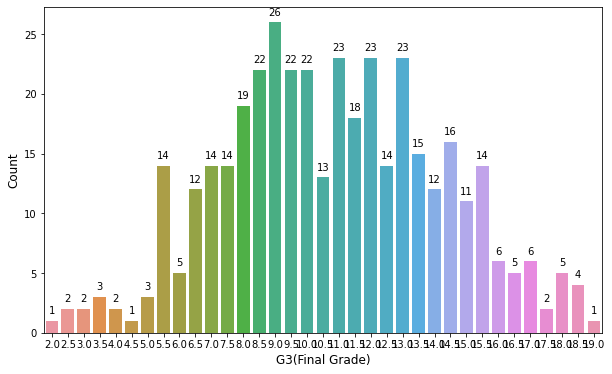

In [54]:
df_mat["G12"] = (df_mat["G1"]+df_mat["G2"])/2

plt.figure(figsize = (10,6))
ax = sns.countplot(df_mat['G12'])
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 0.6,p.get_height(),ha = 'center')

In [0]:
df_mat['G3New'] = np.where((df_mat['G3'] == 0 ), #For rows with G3 == 0 
                           df_mat['G12'].apply(np.floor),      #We place rounded down "G12" values
                           df_mat['G3'])      #In column "G3"

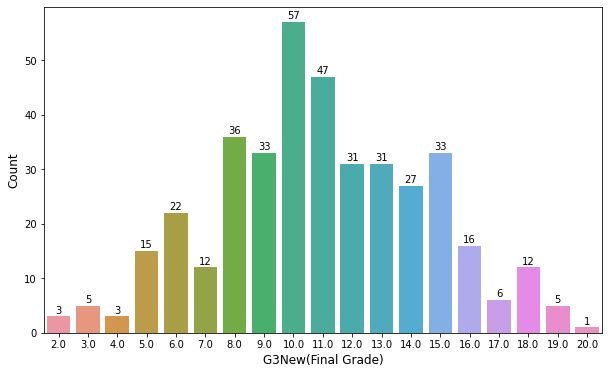

In [56]:
plt.figure(figsize = (10,6))
ax = sns.countplot(df_mat['G3New'])
plt.xlabel('G3New(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 0.6,p.get_height(),ha = 'center')

# Probar con rangos de notas


In [57]:
df_mat["G3"].value_counts()

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
4      1
20     1
Name: G3, dtype: int64

In [0]:
#for scalefactor in range(1,11):
scalefactor =2
#df_mat["G3Bagged"] = df_mat["G3New"].apply(lambda x: x/scalefactor)
df_mat["G3Bagged"] = df_mat["G3New"].apply(lambda x: math.floor(x/scalefactor))


df_mat_one_hot["G3Bagged"] = df_mat["G3Bagged"]

In [59]:

# Define our dependent variable

y_column = 'G3Bagged'
y = df_mat_one_hot[y_column]
# Define  our independent variables
x_columns = ["absences", "goout", "romantic", "higher", "famsup", "failures", "studytime", "age", "sex"]
#x_columns = df_mat_one_hot.drop(columns = ["G3", "G3Bagged"]).columns
X = df_mat_one_hot[x_columns]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
#X['cnst'] = 0
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1Bagged = sm.OLS(endog = y_train,exog = X_train).fit()
print(scalefactor, model1Bagged.rsquared)
#print(model1Bagged.summary())

2 0.9105660807304297


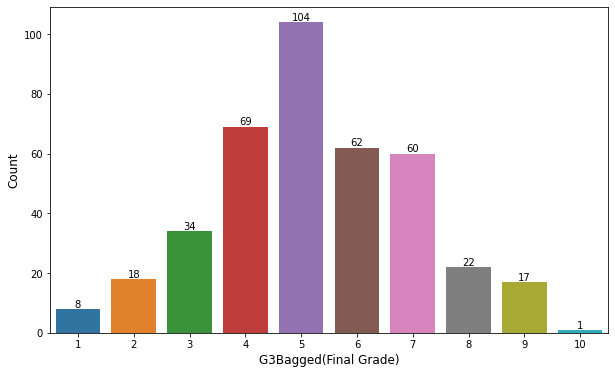

In [60]:
plt.figure(figsize = (10,6))
ax = sns.countplot(df_mat['G3Bagged'])
plt.xlabel('G3Bagged(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 0.6,p.get_height(),ha = 'center')

In [61]:
y_pred_test = model1Bagged.predict(X_test)
print(f'root mean squared error on test data: {np.sqrt(mean_squared_error(y_test,y_pred_test)):.4}')


root mean squared error on test data: 1.763


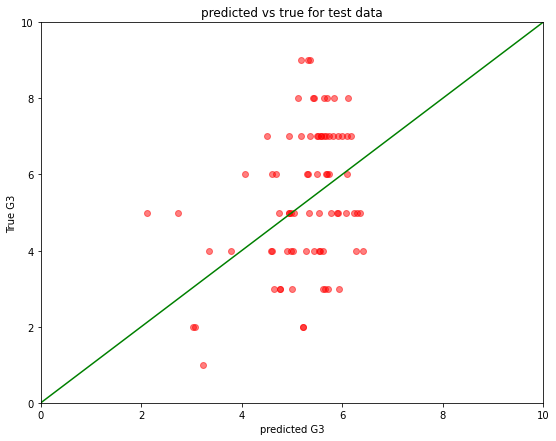

In [62]:
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test, y_test, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('predicted G3')
plt.ylabel('True G3')
plt.xlim(0,20/scalefactor)
plt.ylim(0,20/scalefactor)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g');
plt.show();

In [63]:
y_pred_test_bagged = y_pred_test.apply(lambda x: round(x))
y_test_bagged = y_test.apply(lambda x: round(x))
print(f'root mean squared error on test data: {np.sqrt(mean_squared_error(y_test_bagged,y_pred_test_bagged)):.4}')


root mean squared error on test data: 1.8


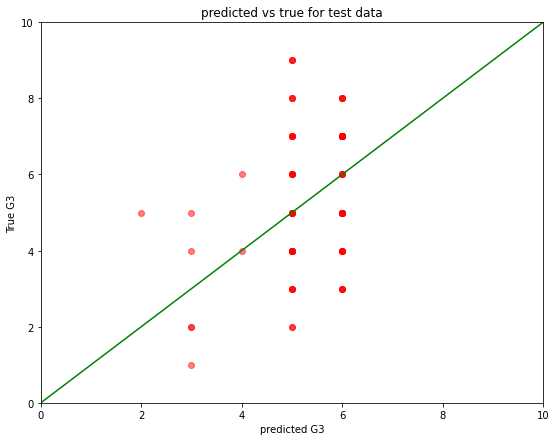

In [64]:
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test_bagged, y_test_bagged, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('predicted G3')
plt.ylabel('True G3')
plt.xlim(0,20/scalefactor)
plt.ylim(0,20/scalefactor)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g');
plt.show();

In [65]:
y_pred_test.describe()

count    79.000000
mean      5.230859
std       0.854266
min       2.110438
25%       4.940389
50%       5.438240
75%       5.723193
max       6.417301
dtype: float64

In [66]:
X

,absences,goout,romantic,higher,famsup,failures,studytime,age,sex
0,6,4,0,1,0,0,2,18,1
1,4,3,0,1,1,0,2,17,1
2,10,2,0,1,0,3,2,15,1
3,2,2,1,1,1,0,3,15,1
4,4,2,0,1,1,0,2,16,1
...,...,...,...,...,...,...,...,...,...
390,11,4,0,1,1,2,2,20,0
391,3,5,0,1,0,0,1,17,0
392,3,3,0,1,0,3,1,21,0
393,0,1,0,1,0,0,1,18,0


# PCA (nada aqui)

In [0]:
# Using PCA from sklearn PCA
#pca = PCA() #n_components=2)
#X_centered = X - X.mean(axis=0)
#pca.fit(X_centered)
#X_pca = pca.transform(X_centered)

In [0]:
#pca.fit(X_train)
#print('Proportion of variance explained by each component:\n' +\
#      '1st component - %.2f,\n2nd component - %.2f\n' %
#      tuple(pca.explained_variance_ratio_))
#print('Directions of principal components:\n' +\
#      '1st component:', pca.components_[0],
#      '\n2nd component:', pca.components_[1])
#

# Silhouetting (KMeans)

In [69]:
df_mat_one_hot.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,...,absences,G3,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother,G3Bagged
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,...,6,6,1,0,0,0,0,0,0,1,1,0,0,0,1,3
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,...,4,6,1,0,0,0,0,1,0,0,1,0,0,1,0,3
2,1,1,15,1,0,1,1,1,1,2,3,1,0,1,0,1,...,10,10,1,0,0,0,0,1,0,0,0,0,0,0,1,5
3,1,1,15,1,1,1,4,2,1,3,0,0,1,1,1,1,...,2,15,0,0,0,0,0,0,1,0,0,1,0,0,1,7
4,1,1,16,1,1,1,3,3,1,2,0,0,1,1,0,1,...,4,10,0,1,0,0,0,1,0,0,0,1,0,1,0,5


In [70]:
X.head()

,absences,goout,romantic,higher,famsup,failures,studytime,age,sex
0,6,4,0,1,0,0,2,18,1
1,4,3,0,1,1,0,2,17,1
2,10,2,0,1,0,3,2,15,1
3,2,2,1,1,1,0,3,15,1
4,4,2,0,1,1,0,2,16,1


In [0]:
scaler = StandardScaler()

In [0]:
X_std = scaler.fit_transform(df_mat_one_hot)

In [73]:
print(X.shape,X_std.shape, df_mat_one_hot.shape)

(395, 9) (395, 41) (395, 41)


For n_clusters = 2 The average silhouette_score is : 0.0628722520530283
For n_clusters = 3 The average silhouette_score is : 0.057446708815908756
For n_clusters = 4 The average silhouette_score is : 0.04877790812763792
For n_clusters = 5 The average silhouette_score is : 0.05612829453076368
For n_clusters = 6 The average silhouette_score is : 0.05235787147557201
For n_clusters = 7 The average silhouette_score is : 0.05240401297347121
For n_clusters = 8 The average silhouette_score is : 0.05028489577636191
For n_clusters = 9 The average silhouette_score is : 0.057965597568101476
For n_clusters = 10 The average silhouette_score is : 0.043455087611993105
For n_clusters = 11 The average silhouette_score is : 0.03654355727935829


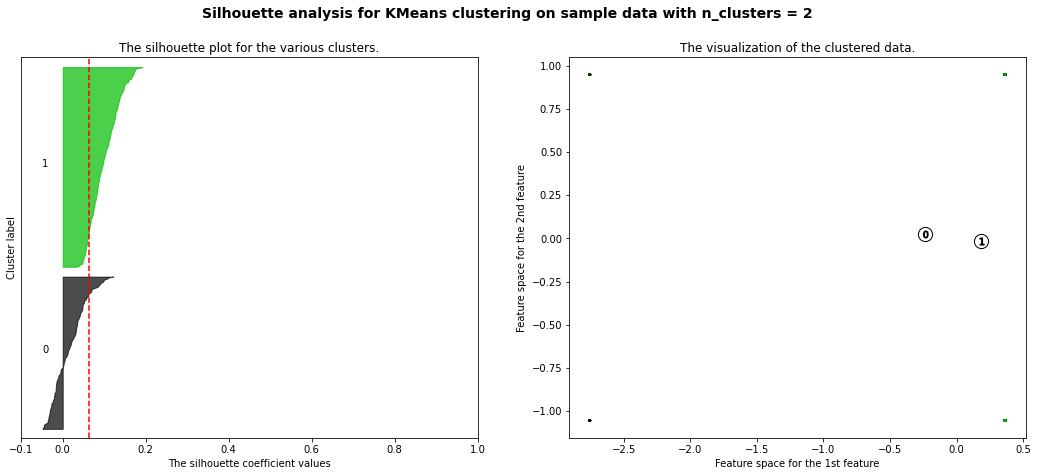

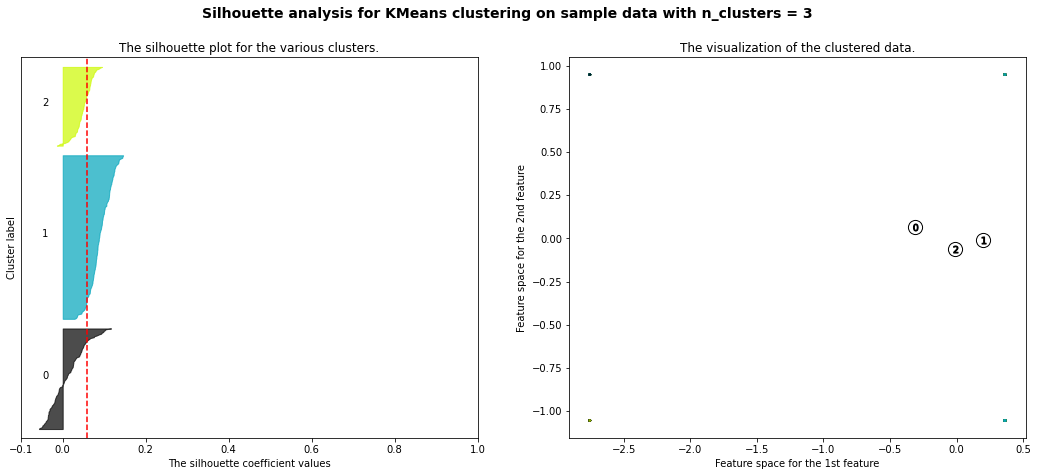

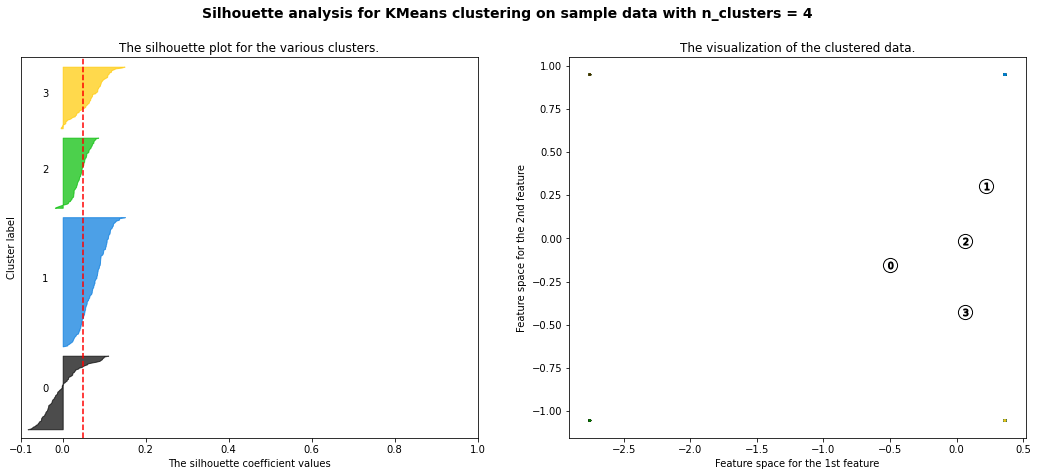

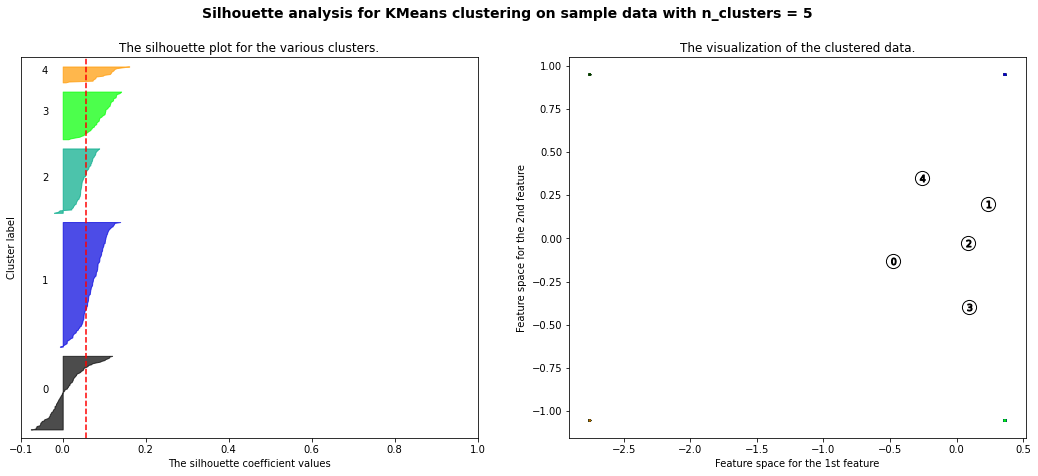

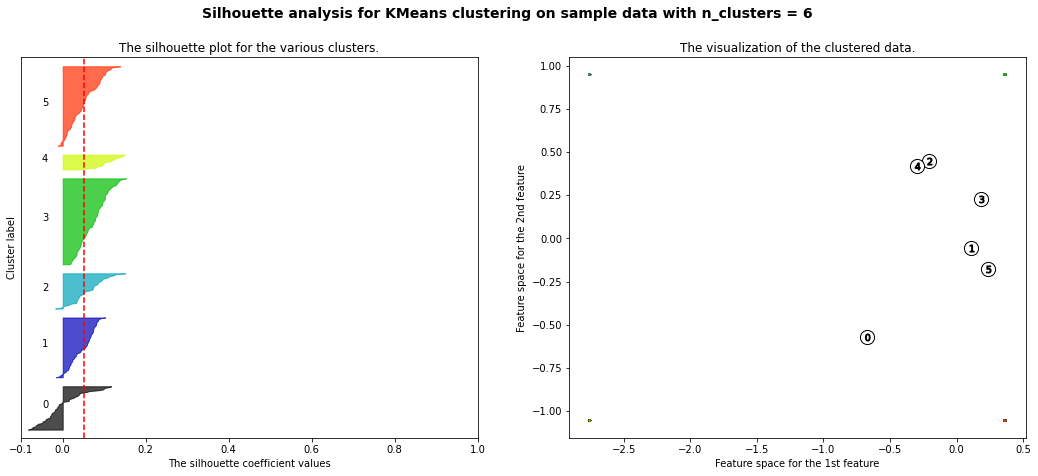

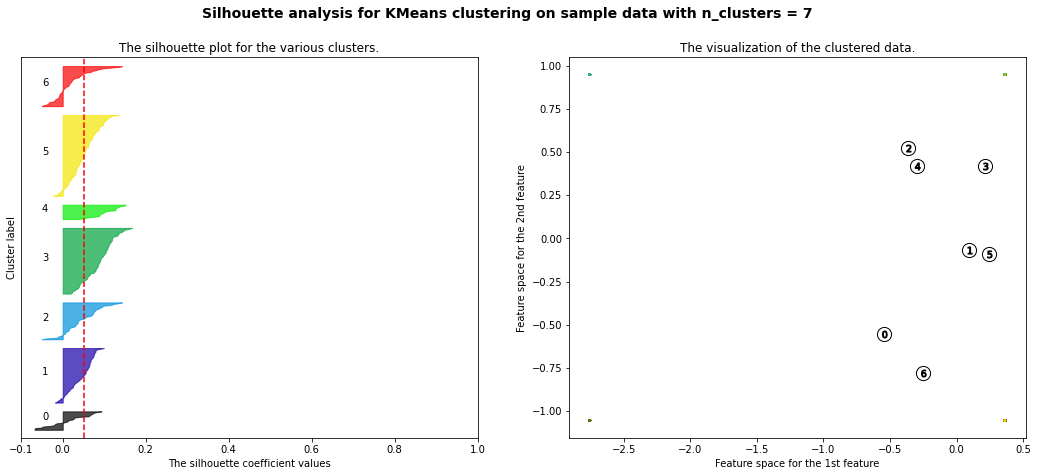

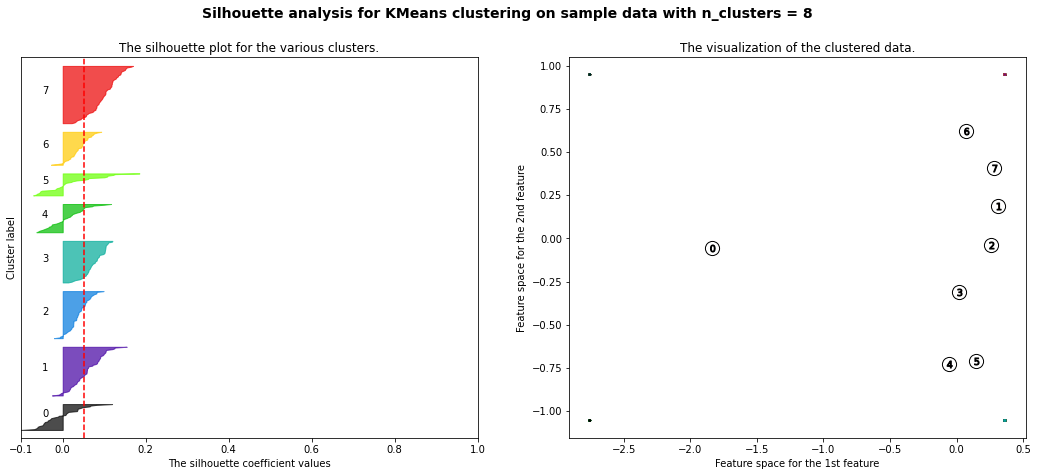

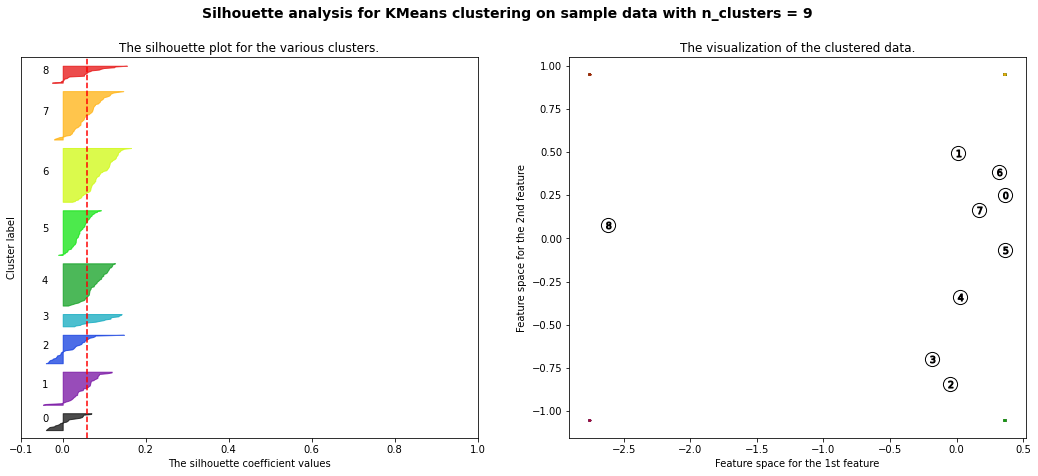

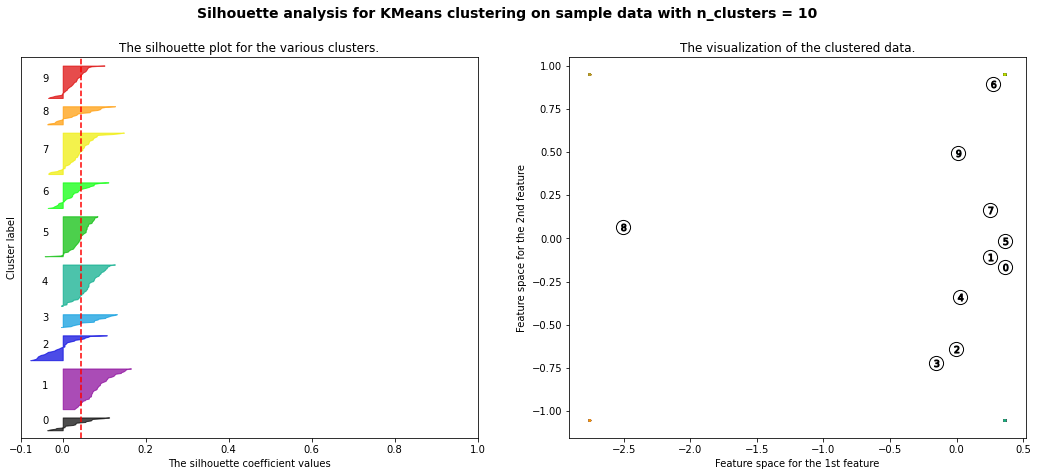

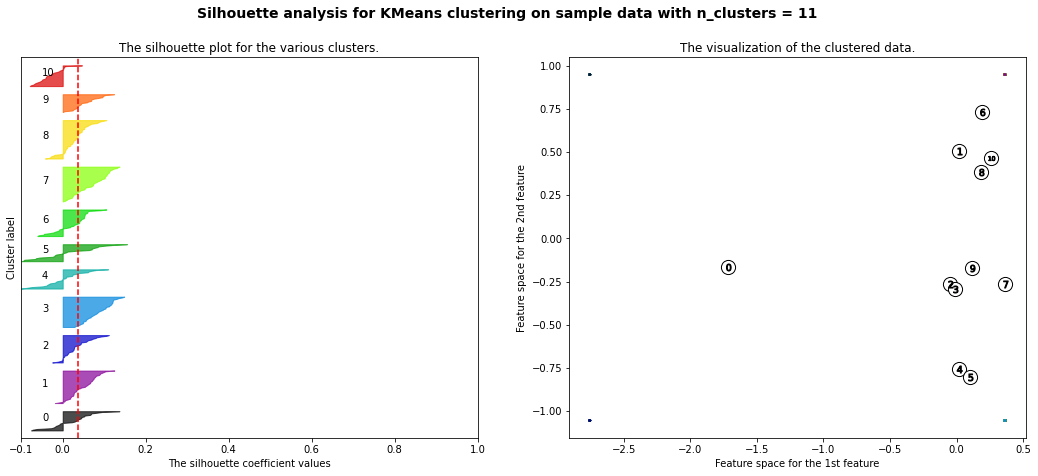

In [74]:
#Silhouette plots

range_n_clusters = range(2,12)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_std) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_std)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_std, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_std, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        #X_std.iloc[:,0], X_std.iloc[:, 1],
        X_std[:, 0], X_std[:, 1], 
        marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [75]:
#Code to plot the graph of silhouette values

range_n_clusters = range(2,20)
silhouette_list = []
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_std)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_std, cluster_labels)
    silhouette_list.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Create a subplot with 1 row and 2 columns
print(silhouette_list)

#fig = plt.scatter()
#ax = plt.axes()
#fig, ax = plt.figure(1,1)
#fig.set_size_inches(18, 7)
#fig.xlim(2,20)
#x = np.linspace(0, 10, 1000)
#ax.plot(n_clusters, silhouette_list[n_clusters],color = 'g',linewidth = 5);

For n_clusters = 2 The average silhouette_score is : 0.0628722520530283
For n_clusters = 3 The average silhouette_score is : 0.057446708815908756
For n_clusters = 4 The average silhouette_score is : 0.04877790812763792
For n_clusters = 5 The average silhouette_score is : 0.05612829453076368
For n_clusters = 6 The average silhouette_score is : 0.05235787147557201
For n_clusters = 7 The average silhouette_score is : 0.05240401297347121
For n_clusters = 8 The average silhouette_score is : 0.05028489577636191
For n_clusters = 9 The average silhouette_score is : 0.057965597568101476
For n_clusters = 10 The average silhouette_score is : 0.043455087611993105
For n_clusters = 11 The average silhouette_score is : 0.03654355727935829
For n_clusters = 12 The average silhouette_score is : 0.04872885160414124
For n_clusters = 13 The average silhouette_score is : 0.05301700846529482
For n_clusters = 14 The average silhouette_score is : 0.05280674081413004
For n_clusters = 15 The average silhouette_s

In [76]:
range_list = list(range_n_clusters)

for i in range(0,18):
  print(range_list[i], silhouette_list[i])
print(len(range_list), len(silhouette_list))

2 0.0628722520530283
3 0.057446708815908756
4 0.04877790812763792
5 0.05612829453076368
6 0.05235787147557201
7 0.05240401297347121
8 0.05028489577636191
9 0.057965597568101476
10 0.043455087611993105
11 0.03654355727935829
12 0.04872885160414124
13 0.05301700846529482
14 0.05280674081413004
15 0.05295640648531896
16 0.041849985980346484
17 0.04236711698658377
18 0.04648201753884185
19 0.04641968423916336
18 18


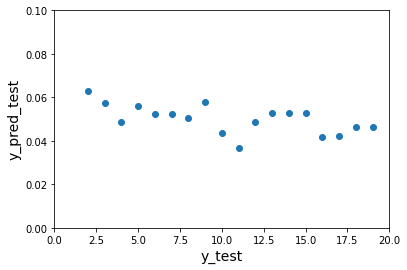

In [77]:
plt.scatter(range_list,silhouette_list)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred_test',fontsize = 14)
plt.xlim(0,20)
plt.ylim(0,0.1)
y_lim = plt.ylim()
x_lim = plt.xlim()
for i in range(0,18):
  plt.plot(range_list[i], silhouette_list[i],color = 'g',linewidth = 5);


## Visualización clusters KMeans

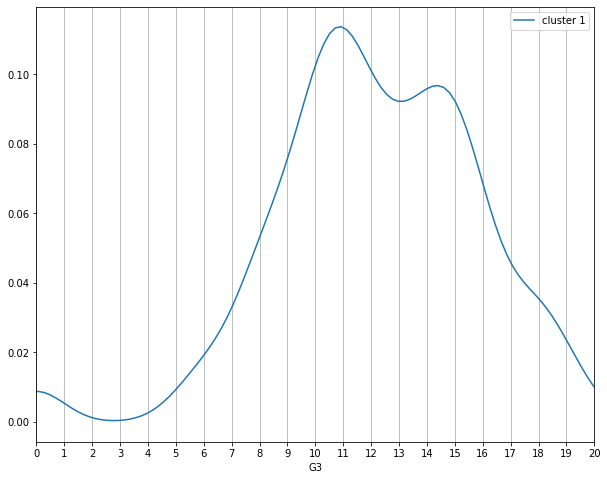

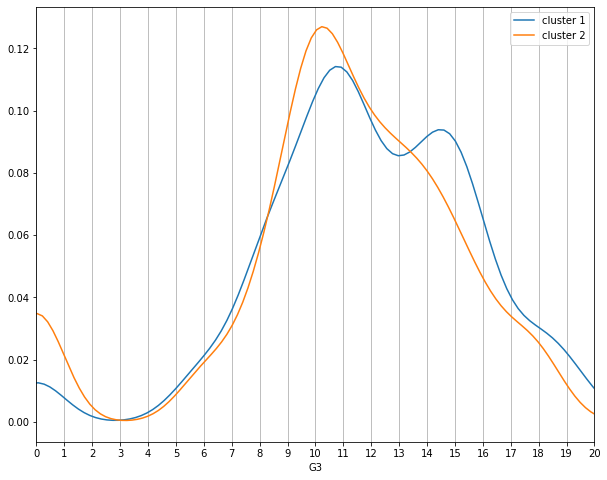

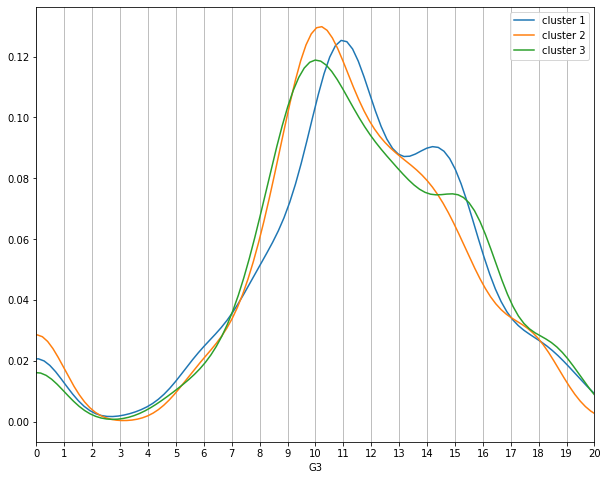

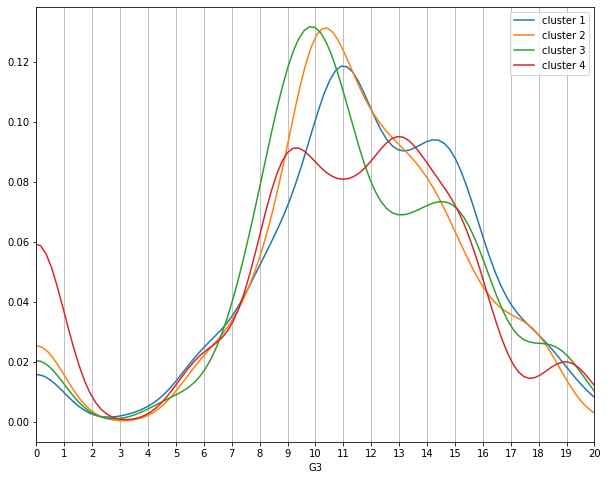

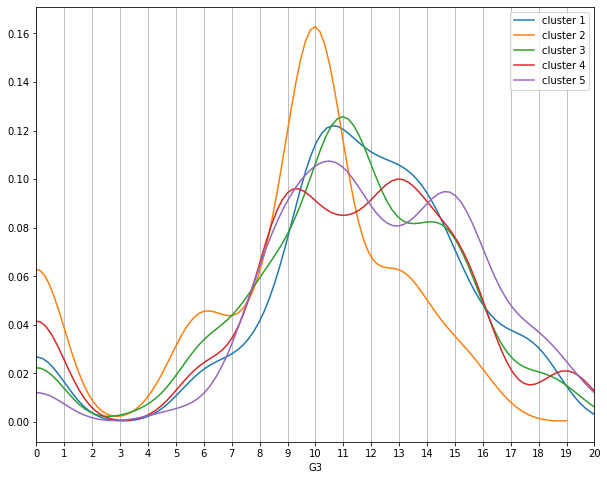

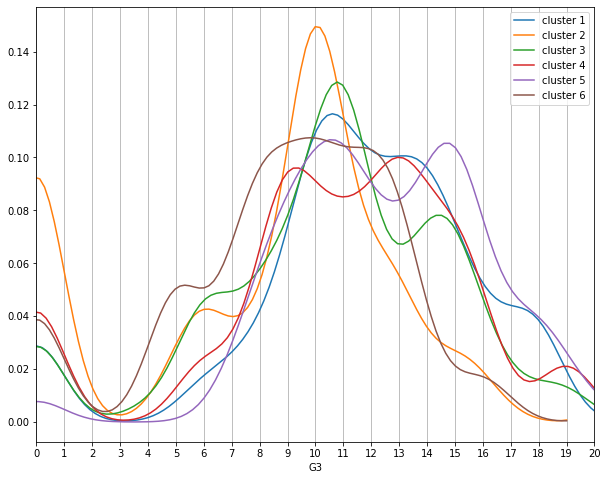

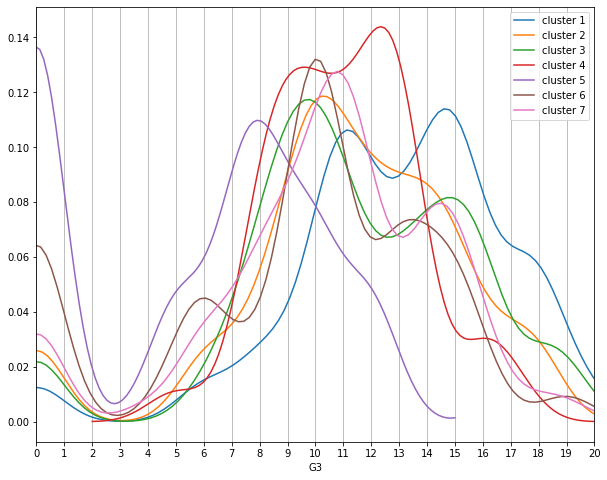

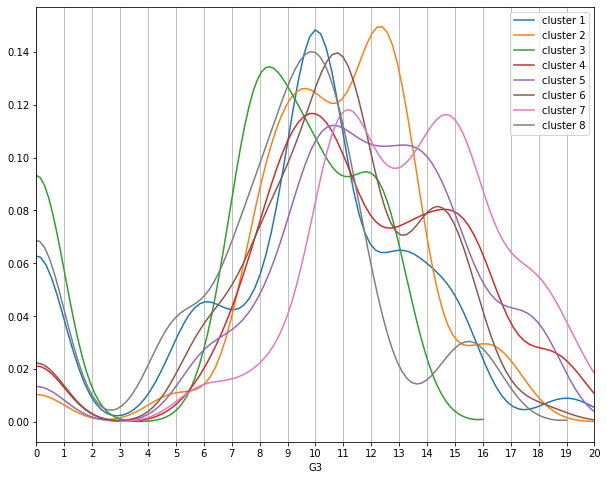

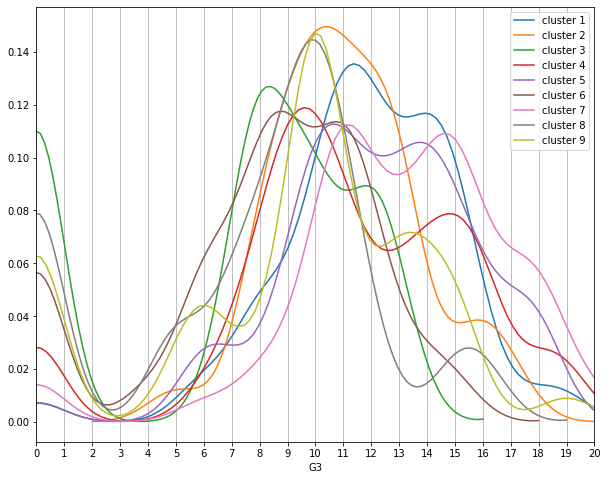

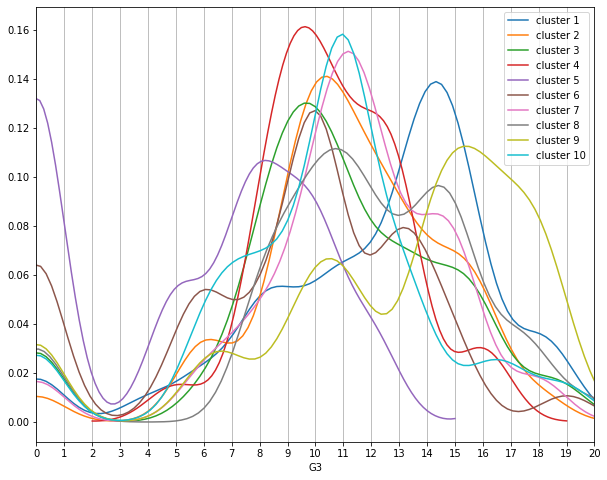

In [115]:
#Silhouette plots

range_n_clusters = range(2,12)

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_std)
    
    
    y_KMclusters = pd.DataFrame(cluster_labels)

    y_KMclusters.columns = ['cluster']
    
    df_mat_one_hot_KMclusters = pd.concat([df_mat_one_hot,y_KMclusters],axis = 1)

    #print(df_mat_one_hot_KMclusters.head())

    #print(df_mat_one_hot_KMclusters['cluster'].value_counts().sort_index())
   
    df_mat_one_hot_KMclusters = one_hot(df_mat_one_hot_KMclusters, ["cluster"])


    df_mat_one_hot_sepclusters = []
    for i in range(1,n_clusters+1):
      df_mat_one_hot_sepclusters.append(df_mat_one_hot_KMclusters[df_mat_one_hot_KMclusters['cluster'] == i])
    #print(len(df_mat_one_hot_sepclusters))
    df_mat_one_hot_sepclusters[0]["G3"]


    fig = plt.figure(figsize = (10,8))

    ax = fig.gca()
    for i in range(len(df_mat_one_hot_sepclusters)):
      sns.distplot(df_mat_one_hot_sepclusters[i]['G3'],hist = False,kde_kws = {'bw':1},bins = np.arange(0,20),label = 'cluster {}'.format(i+1))
    sns.distplot
    plt.xticks(np.arange(0,21))
    plt.xlim(0,20)
    ax.xaxis.grid(True)
    plt.legend();


# Gap Statistic (vacio)

In [0]:
#Roto de momento

In [0]:
# compute gap statistic
#set.seed(123)
#gap_stat <- clusGap(df, FUN = kmeans, nstart = 25,
#                    K.max = 10, B = 50)
# Print the result
#print(gap_stat, method = "firstmax")

In [0]:
## clusGap(x = df, FUNcluster = kmeans, K.max = 10, B = 50, nstart = 25)

# Hierarchical clustering

In [0]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
#hierarchy.set_link_color_palette(['m', 'c', 'y', 'k','g', 'r','b'])
hierarchy.set_link_color_palette(None)

In [0]:


# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np



In [89]:
# generate the linkage matrix
Z = linkage(X_std, 'ward')
Z.shape

(394, 4)

In [90]:
from scipy.cluster.hierarchy import cophenet, inconsistent
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

-0.02771630985878295

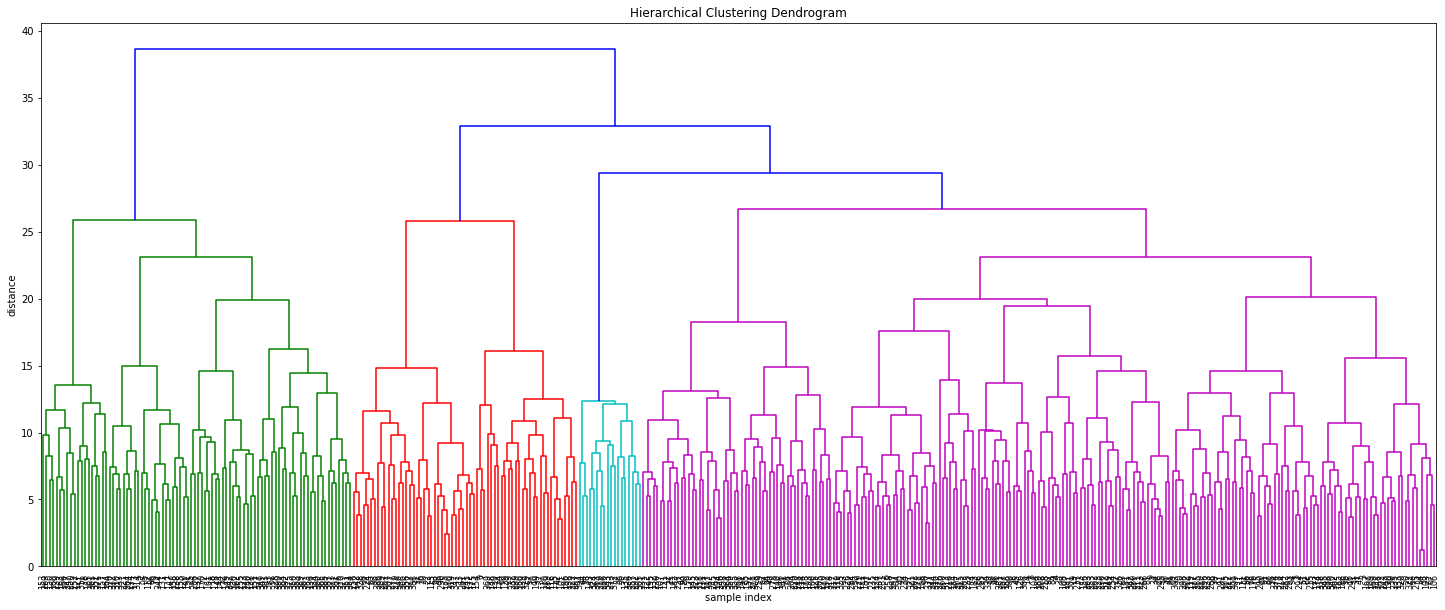

In [91]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()



In [92]:
Z[-4:,2]

array([26.70770478, 29.42430447, 32.89600351, 38.67791369])

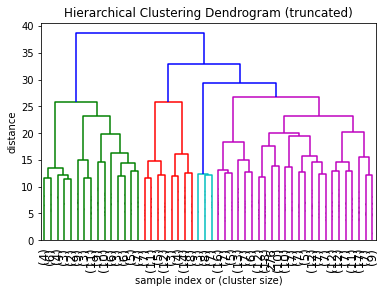

In [93]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=50,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

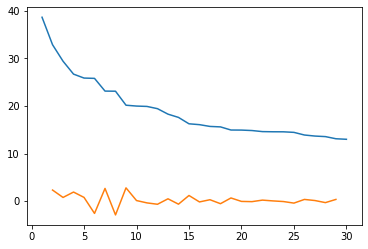

clusters: 9


In [94]:
last = Z[-30:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

In [95]:
print(inconsistent(Z, 5)[-10:])

[[11.56387091  3.52494833 27.          2.38917469]
 [ 9.44773196  3.17083127 31.          3.37957766]
 [13.01046517  3.86175466 30.          2.61568669]
 [10.6152786   4.1339629  29.          3.02877558]
 [ 9.69767096  4.1699653  29.          3.86442067]
 [11.68520704  4.62751017 30.          3.06720641]
 [13.78847389  4.57591487 31.          2.82331102]
 [14.31475704  6.04818923 26.          2.49819357]
 [14.51227456  7.04150681 30.          2.61076634]
 [16.81451797  7.70551019 31.          2.83737159]]


In [96]:
from scipy.cluster.hierarchy import fcluster
#23 da 9 clusters
#25 da 7 clusters
#30 da 3, 35 da 2
max_d = 30
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([2, 1, 1, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3,
       2, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 1, 3, 3, 3, 3, 2, 3, 3, 2, 1, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 2, 1, 3, 3, 2, 2, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 2, 2, 1,
       3, 3, 2, 3, 1, 1, 1, 2, 3, 3, 2, 3, 1, 3, 3, 1, 2, 1, 1, 1, 3, 1,
       2, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 2, 1, 3, 2,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 3,
       2, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 2, 3, 2, 3, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 1, 2,
       1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 2, 3, 3, 3, 3, 2, 3, 3,
       1, 3, 3, 2, 3, 1, 3, 3, 3, 3, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,

In [97]:
number_of_clusters = len(np.unique(clusters))
number_of_clusters

3

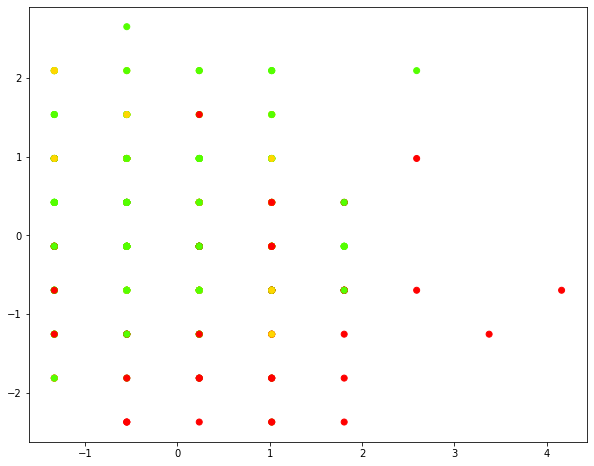

In [98]:

plt.figure(figsize=(10, 8))
plt.scatter(X_std[:,2], X_std[:,40], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

## Visualización de los clusters

In [99]:
df_mat_one_hot.shape

(395, 41)

In [0]:
y_dendoclusters = pd.DataFrame(clusters)

y_dendoclusters.columns = ['cluster']

In [101]:
df_mat_one_hot_dendoclusters = pd.concat([df_mat_one_hot,y_dendoclusters],axis = 1)

df_mat_one_hot_dendoclusters.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,...,G3,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother,G3Bagged,cluster
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,...,6,1,0,0,0,0,0,0,1,1,0,0,0,1,3,2
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,...,6,1,0,0,0,0,1,0,0,1,0,0,1,0,3,1
2,1,1,15,1,0,1,1,1,1,2,3,1,0,1,0,1,...,10,1,0,0,0,0,1,0,0,0,0,0,0,1,5,1
3,1,1,15,1,1,1,4,2,1,3,0,0,1,1,1,1,...,15,0,0,0,0,0,0,1,0,0,1,0,0,1,7,3
4,1,1,16,1,1,1,3,3,1,2,0,0,1,1,0,1,...,10,0,1,0,0,0,1,0,0,0,1,0,1,0,5,3


In [102]:
df_mat_one_hot_dendoclusters['cluster'].value_counts().sort_index()

1     88
2     64
3    243
Name: cluster, dtype: int64

In [0]:
df_mat_one_hot_dendoclusters = one_hot(df_mat_one_hot_dendoclusters, ["cluster"])

In [104]:
df_mat_one_hot_dendoclusters.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,...,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother,G3Bagged,cluster,cluster_1,cluster_2,cluster_3
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0,1,3,2,0,1,0
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1,0,3,1,1,0,0
2,1,1,15,1,0,1,1,1,1,2,3,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0,1,5,1,1,0,0
3,1,1,15,1,1,1,4,2,1,3,0,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,0,1,7,3,0,0,1
4,1,1,16,1,1,1,3,3,1,2,0,0,1,1,0,1,...,0,0,0,1,0,0,0,1,0,1,0,5,3,0,0,1


In [105]:
df_mat_one_hot_sepclusters = []
for i in range(1,number_of_clusters+1):
  df_mat_one_hot_sepclusters.append(df_mat_one_hot_dendoclusters[df_mat_one_hot_dendoclusters['cluster'] == i])
print(len(df_mat_one_hot_sepclusters))
df_mat_one_hot_sepclusters[0]["G3"]

3


1       6
2      10
18      5
25      8
52     10
       ..
389     0
390     9
391    16
392     7
393    10
Name: G3, Length: 88, dtype: int64

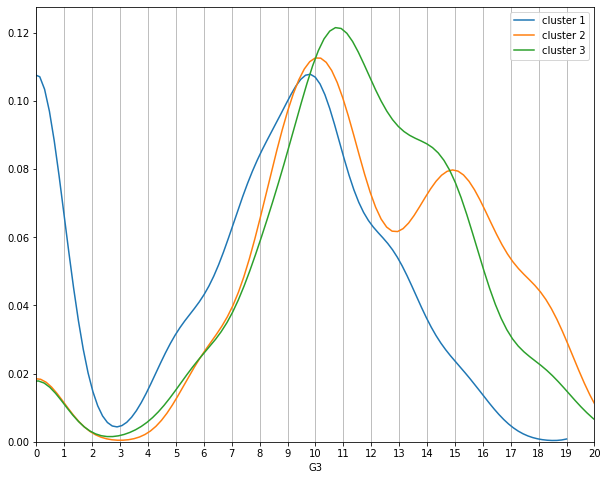

In [106]:
fig = plt.figure(figsize = (10,8))
ax = fig.gca()
for i in range(len(df_mat_one_hot_sepclusters)):
  sns.distplot(df_mat_one_hot_sepclusters[i]['G3'],hist = False,kde_kws = {'bw':1},bins = np.arange(0,20),label = 'cluster {}'.format(i+1))
sns.distplot
plt.xticks(np.arange(0,21))
plt.xlim(0,20)
ax.xaxis.grid(True)
plt.legend();

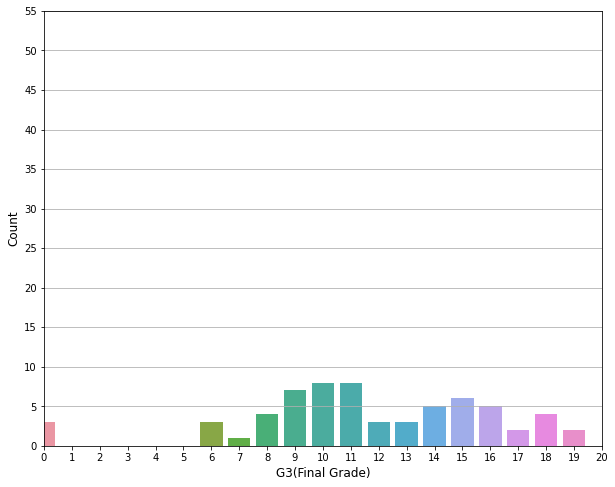

In [107]:
plt.figure(figsize = (10,8))
ax = sns.countplot(df_mat_one_hot_sepclusters[1]['G3'],order = list(range(0,21)))
plt.xticks(np.arange(0,21))
plt.yticks(np.arange(0,56,5))
plt.xlim(0,20)
plt.ylim(0,55)
ax.yaxis.grid(True)
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12);